## Flight Price Prediction
### Machinehack Competition
#### Overview
Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Huh! Here we take on the challenge! As data scientists, we are gonna prove that given the right data anything can be predicted. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.     Size of training set: 10683 records Size of test set: 2671 records FEATURES: Airline: The name of the airline. Date_of_Journey: The date of the journey Source: The source from which the service begins. Destination: The destination where the service ends. Route: The route taken by the flight to reach the destination. Dep_Time: The time when the journey starts from the source. Arrival_Time: Time of arrival at the destination. Duration: Total duration of the flight. Total_Stops: Total stops between the source and destination. Additional_Info: Additional information about the flight Price: The price of the ticket

### SUBMISSION OF PROJECT 
# RANK - 359, Best Score & Latest Score - 0.89402

<img src='machine_hack.jpg' width=100% height=100%/>
#### link:
https://www.machinehack.com/hackathons/predict_the_flight_ticket_price_hackathon/overview

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train_data=pd.read_excel('Data_Train.xlsx')
test_data=pd.read_excel('Test_set.xlsx')

In [3]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
train_data['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [5]:
train_data['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [6]:
train_data['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [7]:
train_data['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [8]:
train_data['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [9]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [10]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [11]:
test_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [12]:
train_data.dropna(inplace=True)
test_data.dropna(inplace=True)

In [13]:
test_data.head(1)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info


In [14]:
train_data.shape

(10682, 11)

In [15]:
train_data["Journey_day"]=pd.to_datetime(train_data.Date_of_Journey,format="%d/%m/%Y").dt.day
test_data["Journey_day"]=pd.to_datetime(test_data.Date_of_Journey,format="%d/%m/%Y").dt.day

In [16]:
train_data['Journey_Month']=pd.to_datetime(train_data.Date_of_Journey,format="%d/%m/%Y").dt.month
test_data['Journey_Month']=pd.to_datetime(test_data.Date_of_Journey,format="%d/%m/%Y").dt.month

In [17]:
train_data.head(1)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_Month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3


In [18]:
test_data.head(1)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Journey_day,Journey_Month
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,6,6


In [19]:
train_data.drop(["Date_of_Journey"],axis=1,inplace=True)
test_data.drop(["Date_of_Journey"],axis=1,inplace=True)


In [20]:
train_data['Dep_Hour']=pd.to_datetime(train_data['Dep_Time']).dt.hour
train_data['Dep_Mins']=pd.to_datetime(train_data['Dep_Time']).dt.minute
test_data['Dep_Hour']=pd.to_datetime(test_data['Dep_Time']).dt.hour
test_data['Dep_Mins']=pd.to_datetime(test_data['Dep_Time']).dt.minute

In [21]:
train_data.head(1)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_Month,Dep_Hour,Dep_Mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20


In [22]:
train_data.drop('Dep_Time',axis=1,inplace=True)
test_data.drop('Dep_Time',axis=1,inplace=True)

In [23]:
train_data['Arrival_Hour']=pd.to_datetime(train_data['Arrival_Time']).dt.hour
test_data['Arrival_Hour']=pd.to_datetime(test_data['Arrival_Time']).dt.hour

In [24]:
train_data['Arrival_minutes']=pd.to_datetime(train_data['Arrival_Time']).dt.minute   
test_data['Arrival_minutes']=pd.to_datetime(test_data['Arrival_Time']).dt.minute   

In [25]:
train_data.drop('Arrival_Time',axis=1,inplace=True)
test_data.drop('Arrival_Time',axis=1,inplace=True)

In [26]:
duration=list(train_data['Duration'])
for i in range(len(duration)):
    if len(duration[i].split()) !=2:
        if "h" in duration[i]:
            duration[i]=duration[i].strip()+" 0m"
        else:
            duration[i]="0h "+duration[i]
            
duration_hours=[]
duration_mins=[]
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep="h")[0]))
    duration_mins.append(int(duration[i].split(sep="m")[0].split()[-1]))

In [27]:
duration_test=list(test_data['Duration'])
for i in range(len(duration_test)):
    if len(duration_test[i].split()) !=2:
        if "h" in duration_test[i]:
            duration_test[i]=duration_test[i].strip()+" 0m"
        else:
            duration_test[i]="0h "+duration_test[i]
            
duration_hourst=[]
duration_minst=[]
for i in range(len(duration_test)):
    duration_hourst.append(int(duration_test[i].split(sep="h")[0]))
    duration_minst.append(int(duration_test[i].split(sep="m")[0].split()[-1]))

In [28]:
train_data['Duration_hours']=duration_hours
train_data['Duration_mins']=duration_mins
test_data['Duration_hours']=duration_hourst
test_data['Duration_mins']=duration_minst

In [29]:
train_data.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_Month,Dep_Hour,Dep_Mins,Arrival_Hour,Arrival_minutes,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15,7,25


In [30]:
test_data.head(1)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Journey_day,Journey_Month,Dep_Hour,Dep_Mins,Arrival_Hour,Arrival_minutes,Duration_hours,Duration_mins
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,10h 55m,1 stop,No info,6,6,17,30,4,25,10,55


In [31]:
train_data.drop("Duration",axis=1,inplace=True)
test_data.drop("Duration",axis=1,inplace=True)

In [32]:
#Handling Categorical Data

In [33]:
train_data['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

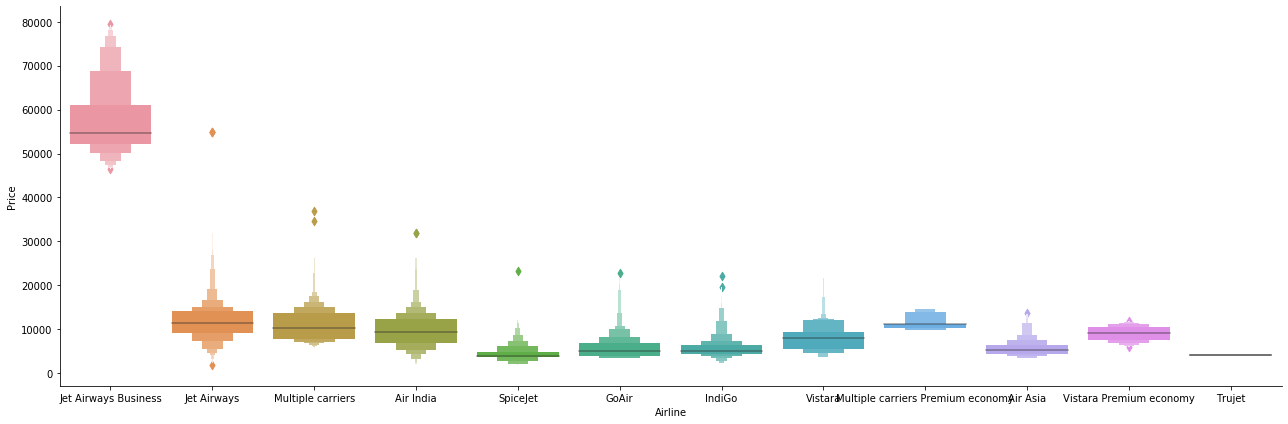

In [34]:
sns.catplot(y='Price',x='Airline',data=train_data.sort_values("Price",ascending=False),kind="boxen",height=6,aspect=3)
plt.show()

In [35]:
Airline=train_data[['Airline']]
Airline=pd.get_dummies(Airline,drop_first=True)
Airline.head(2)

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0


In [36]:
Airline_test=test_data[['Airline']]
Airline_test=pd.get_dummies(Airline_test,drop_first=True)
Airline_test.head(2)

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,0,1,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0


In [37]:
train_data.Source.value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

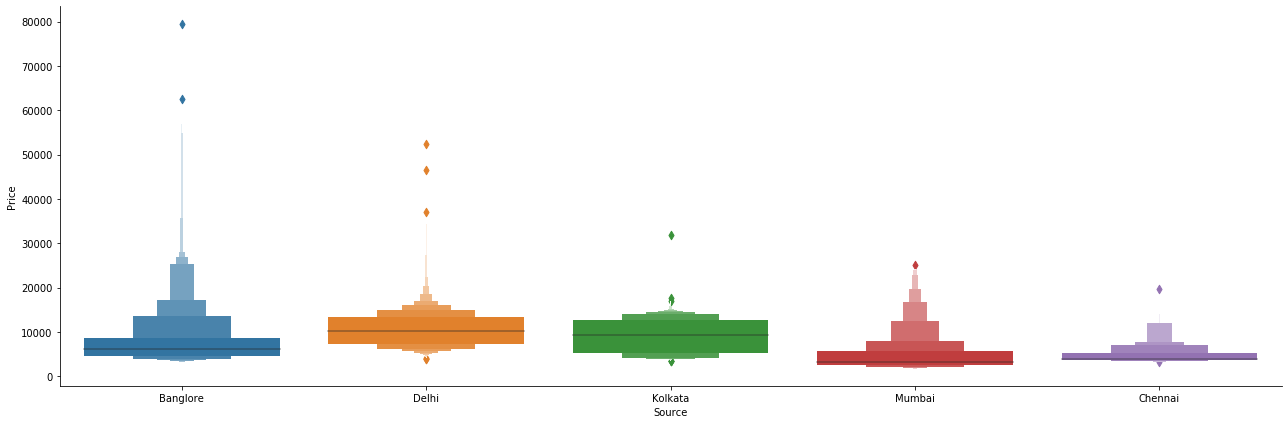

In [38]:
sns.catplot(y="Price",x="Source",data=train_data.sort_values("Price",ascending=False),kind="boxen",height=6,aspect=3)

In [39]:
Source=pd.get_dummies(train_data.Source,drop_first=True)
Source.head(2)

,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0


In [40]:
Source_test=pd.get_dummies(test_data.Source,drop_first=True)
Source_test.head(2)

,Chennai,Delhi,Kolkata,Mumbai
0,0,1,0,0
1,0,0,1,0


In [41]:
dest=pd.get_dummies(train_data[['Destination']],drop_first=True)
dest.head(2)

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0


In [42]:
dest_test=pd.get_dummies(test_data[['Destination']],drop_first=True)
dest_test.head(2)

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,0,0,0,0
1,0,0,0,0,0


In [43]:
train_data.drop(['Route','Additional_Info'],axis=1,inplace=True)
test_data.drop(['Route','Additional_Info'],axis=1,inplace=True)

In [44]:
train_data.replace({"non-stop":0,"1 stop":1,"2 stops":2,"3 stops":3,"4 stops":4},inplace=True)
test_data.replace({"non-stop":0,"1 stop":1,"2 stops":2,"3 stops":3,"4 stops":4},inplace=True)

In [45]:
train_data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_Month,Dep_Hour,Dep_Mins,Arrival_Hour,Arrival_minutes,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45


In [46]:
test_data.head(2)

,Airline,Source,Destination,Total_Stops,Journey_day,Journey_Month,Dep_Hour,Dep_Mins,Arrival_Hour,Arrival_minutes,Duration_hours,Duration_mins
0,Jet Airways,Delhi,Cochin,1,6,6,17,30,4,25,10,55
1,IndiGo,Kolkata,Banglore,1,12,5,6,20,10,20,4,0


In [47]:
train_data.drop(['Airline','Source','Destination'],axis=1,inplace=True)
test_data.drop(['Airline','Source','Destination'],axis=1,inplace=True)

In [48]:
final_train=pd.concat([train_data,Airline,Source,dest],axis=1)
final_test=pd.concat([test_data,Airline_test,Source_test,dest_test],axis=1)

In [49]:
pd.set_option('display.max_columns',None)

In [50]:
final_train.shape,final_test.shape

((10682, 30), (2671, 28))

In [51]:
final_train.head(2)

,Total_Stops,Price,Journey_day,Journey_Month,Dep_Hour,Dep_Mins,Arrival_Hour,Arrival_minutes,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [52]:
final_test.head(2)

,Total_Stops,Journey_day,Journey_Month,Dep_Hour,Dep_Mins,Arrival_Hour,Arrival_minutes,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,6,6,17,30,4,25,10,55,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,1,12,5,6,20,10,20,4,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [53]:
final_test['Airline_Trujet']=0

In [54]:
final_test.shape

(2671, 29)

In [55]:
final_train.columns

Index(['Total_Stops', 'Price', 'Journey_day', 'Journey_Month', 'Dep_Hour',
       'Dep_Mins', 'Arrival_Hour', 'Arrival_minutes', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Chennai', 'Delhi', 'Kolkata', 'Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi'],
      dtype='object')

In [56]:
X=final_train.loc[:,['Total_Stops',  'Journey_day', 'Journey_Month', 'Dep_Hour',
       'Dep_Mins', 'Arrival_Hour', 'Arrival_minutes', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Chennai', 'Delhi', 'Kolkata', 'Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi']]

In [57]:
y=final_train.iloc[:,1]

In [58]:
from sklearn.ensemble import ExtraTreesRegressor
sel=ExtraTreesRegressor()
sel.fit(X,y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [59]:
print(sel.feature_importances_)

[2.16278729e-01 1.42836934e-01 5.38672255e-02 2.48418546e-02
 2.11427778e-02 2.76067635e-02 1.97261932e-02 1.25507655e-01
 1.72503345e-02 9.47573985e-03 1.88437306e-03 1.77608773e-02
 1.43029578e-01 6.73496121e-02 1.83242114e-02 8.84339335e-04
 3.25375351e-03 8.69655053e-05 5.00310246e-03 8.28462492e-05
 4.86593603e-04 1.19765007e-02 3.60841173e-03 8.45968832e-03
 8.94960962e-03 1.80988479e-02 6.68501105e-03 5.06834515e-04
 2.50346373e-02]


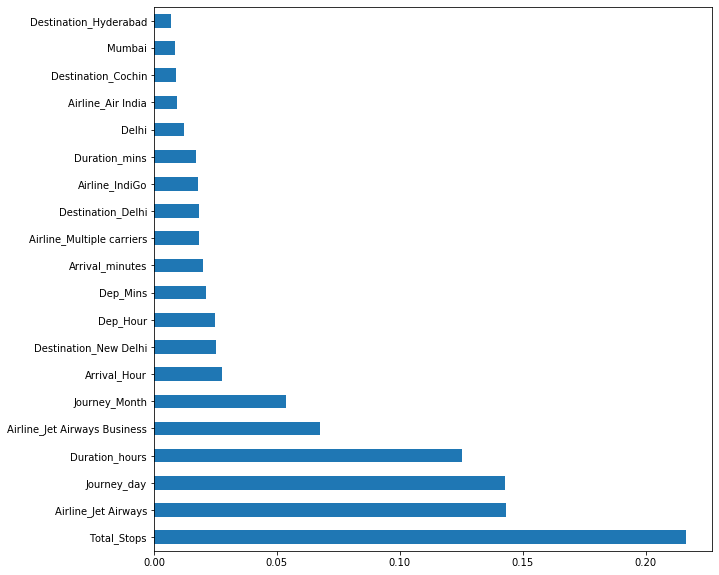

In [60]:
plt.figure(figsize=(10,10))
feat_importances=pd.Series(sel.feature_importances_,index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [61]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=0)

In [62]:
from sklearn.ensemble import RandomForestRegressor
reg=RandomForestRegressor()
reg.fit(X_train,y_train)
reg.score(X_train,y_train)

0.9519017832137514

In [63]:
y_pred=reg.predict(X_test)

In [64]:
from sklearn.metrics import r2_score
rsquare=r2_score(y_test,y_pred)

In [65]:
rsquare

0.7989104926980723

In [66]:
predictions=reg.predict(final_test)

In [67]:
predictions

array([13705.976     ,  4601.22      , 15123.71866667, ...,
       16192.055     , 14697.65      ,  7333.67      ])

In [68]:
prediction = pd.DataFrame(predictions, columns=['predictions']).to_excel('Test_set.xlsx')